## This file contains the python code for data visualization of the popular "Iris" dataset. The dataset is downloaded from the UCI Machine Learning Repository with the link: https://archive.ics.uci.edu/ml/datasets/iris

### Import the required libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Read the dataset using pandas

In [2]:
iris_data = pd.read_csv("Iris.csv")

### See if the data is imported correctly. The following code also helps to see the first 5 observations of the dataset. 

In [3]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### To see the last 5 observations use .tail function

In [4]:
iris_data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### Using describe function to get the summary of the basic statistics of the numeric columns of the data

In [6]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### The first thing to do before starting any visualization is to check if the data contains any missing values. This is checked by using the following code

In [9]:
iris_data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### No columns have any missing values. 
### Now, let us see the count of the various type of species in this dataset.

In [11]:
iris_data["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

### This shows that there are 50 observations in each categories of the Species.

### Now, I want to know the statistics of the data by groups. Let us group the data by Species and use describe to get the statistical attributes (count, min, max, mean, stddev, percentiles)

In [17]:
group = iris_data.groupby('Species')
group.describe()


### Let us now plot the data using the scatter plot by plotting sepal length along x-axis, and sepal width along y-axis. This plot is for sepal only. The visualization for petal will be shown later in this file.

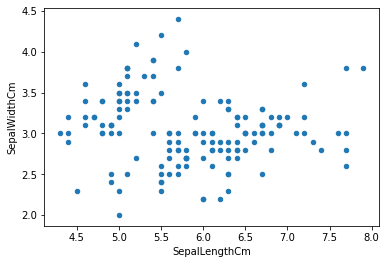

In [20]:
iris_data.plot(kind = 'scatter', x = 'SepalLengthCm', y = 'SepalWidthCm')

### This plot does not give us the good insight, rather we can see the dots that represent the data.

### Using seaborn library, we can add more information to the scatter plot by changing the color of the species by type.

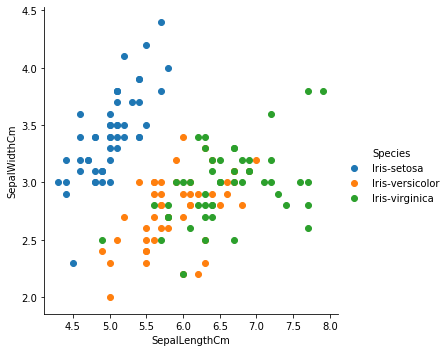

In [26]:
sns.FacetGrid(iris_data,hue = "Species", size=5)\
.map(plt.scatter, "SepalLengthCm", "SepalWidthCm")\
.add_legend()
plt.show()

### The above graph uses color on its own. This color can also be customized which is done in the following codes:

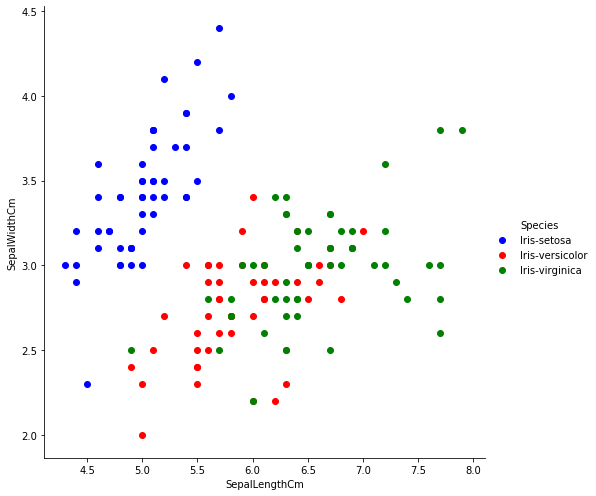

In [34]:
Col = {'color':['blue','red','green']}
sns.FacetGrid(iris_data, hue_kws = Col, hue = "Species", size = 7)\
.map(plt.scatter, "SepalLengthCm", "SepalWidthCm")\
.add_legend()
plt.show()

### We can distinctly see how the setosa falls on the graph. However, the dimensions of versicolor and veerginica have some similar dimensions.

### Let us also see the plot for petal as well. 

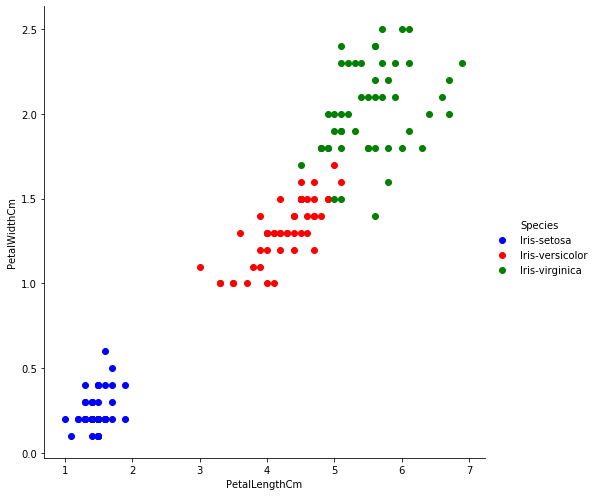

In [38]:
Col = {'color':['blue','red','green']}
sns.FacetGrid(iris_data, hue_kws = Col, hue = "Species", size = 7)\
.map(plt.scatter, "PetalLengthCm", "PetalWidthCm")\
.add_legend()
plt.show()

### Let us see the data points using the box plots. 
### The box plots helps to see variation in the data as well as see if the data contains outliers. 
### The box plots are displayed as subplots where it will be easy to make comparisons among each other.


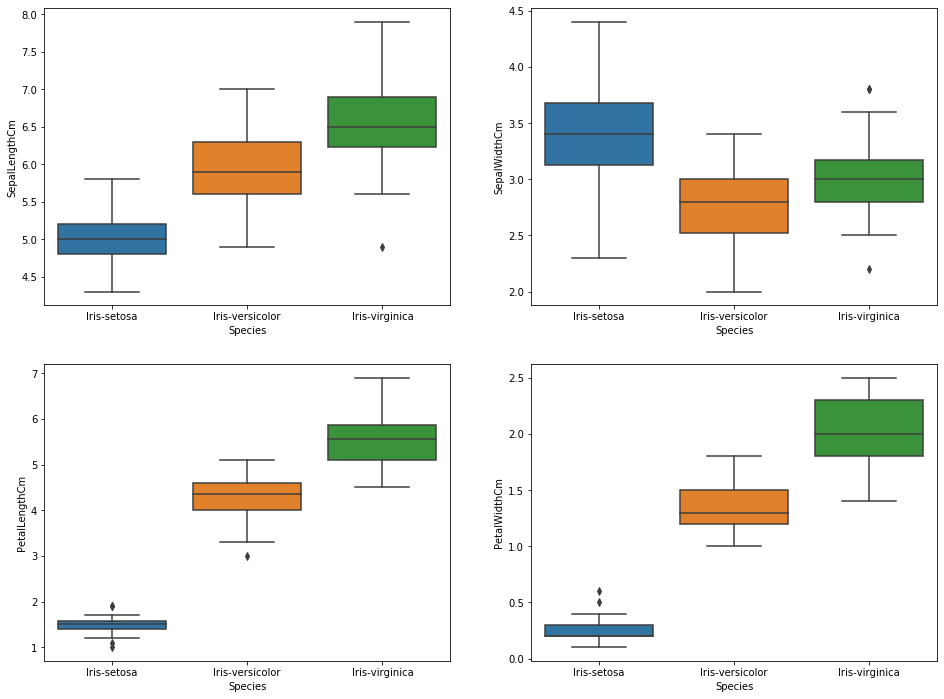

In [52]:
fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(12)

graph1= fig.add_subplot(2,2,1)
sns.boxplot(x = "Species", y = "SepalLengthCm", data =iris_data)

graph2= fig.add_subplot(2,2,2)
sns.boxplot(x = "Species", y = "SepalWidthCm", data =iris_data)

graph1= fig.add_subplot(2,2,3)
sns.boxplot(x = "Species", y = "PetalLengthCm", data =iris_data)

graph1= fig.add_subplot(2,2,4)
sns.boxplot(x = "Species", y = "PetalWidthCm", data =iris_data)




### In the same way, the violin plot also helps to visualize the density of the data.
### If the data are dense in a particular region then it is flatten. 
### If the data are sparse in a particular region then it is pointed. 


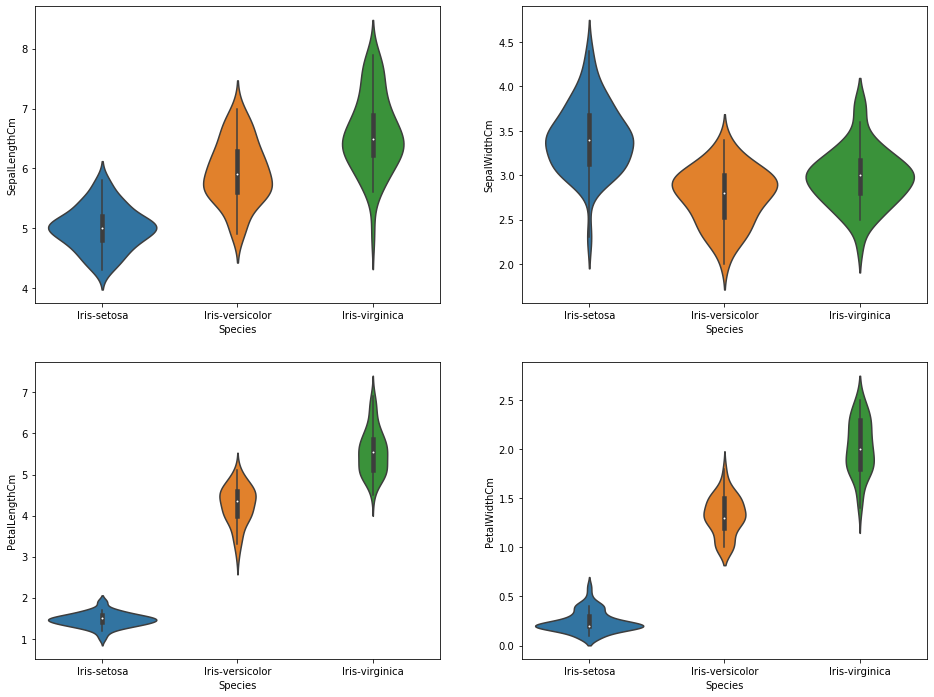

In [54]:
fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(12)

graph1= fig.add_subplot(2,2,1)
sns.violinplot(x = "Species", y = "SepalLengthCm", data =iris_data)

graph2= fig.add_subplot(2,2,2)
sns.violinplot(x = "Species", y = "SepalWidthCm", data =iris_data)

graph1= fig.add_subplot(2,2,3)
sns.violinplot(x = "Species", y = "PetalLengthCm", data =iris_data)

graph1= fig.add_subplot(2,2,4)
sns.violinplot(x = "Species", y = "PetalWidthCm", data =iris_data)

### To analyze the relationship betwen the species, pairplot can be used. 
### This will help to analyze each pair of species with each of their attributes.

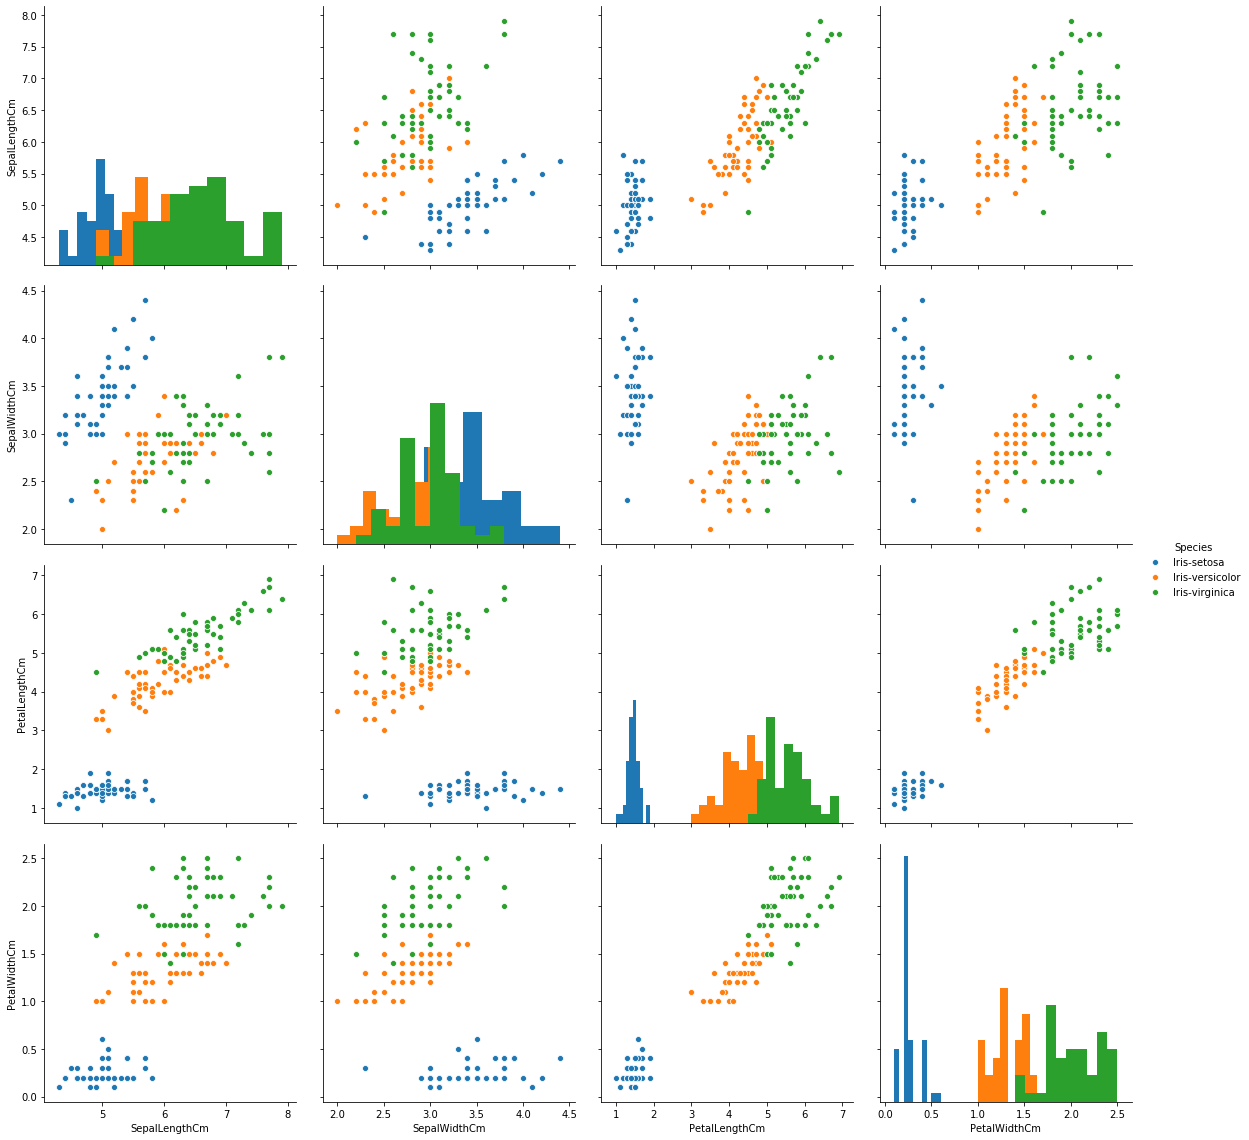

In [66]:
sns.pairplot(iris_data.drop("Id", axis =1), hue = "Species", size=4, diag_kind ="hist" )

plt.show()

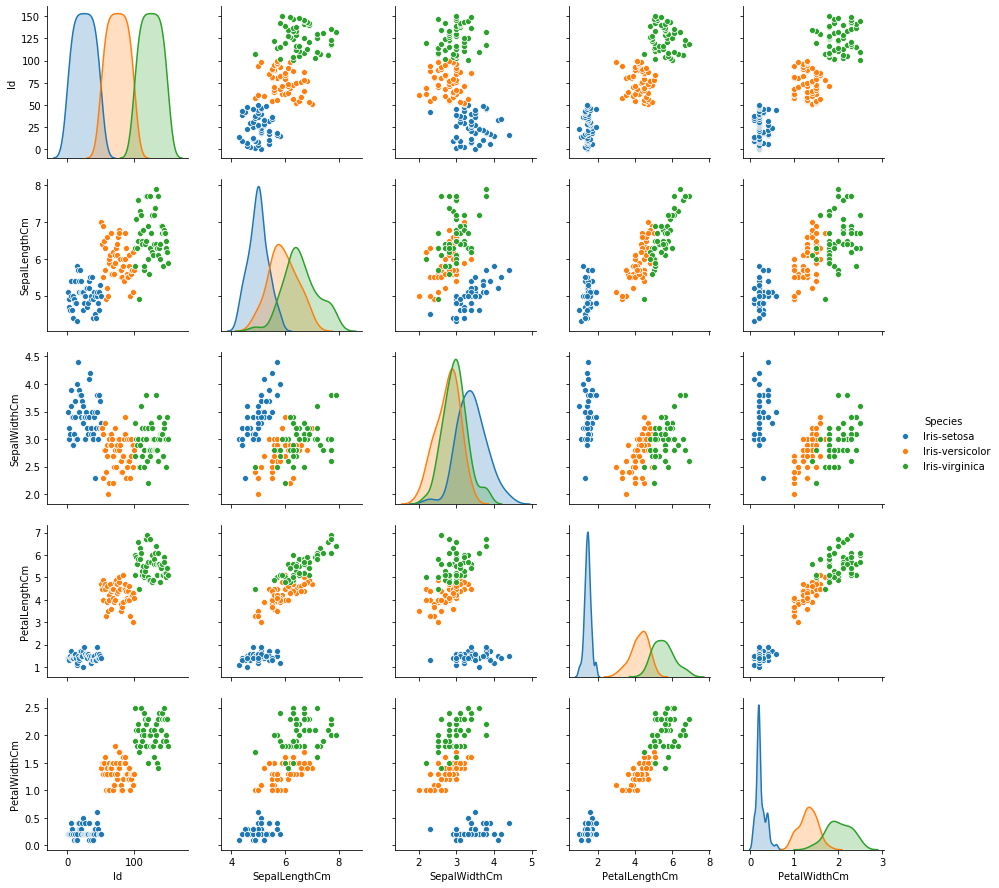

In [67]:
sns.pairplot(iris_data, hue ="Species")